<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/Loan_approval_predection_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing EDA tools
import numpy as np
import pandas as pd
#importing file
df=pd.read_csv("/content/LoanApprovalPrediction.csv")
df.head(50)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
#convert object to numarical form
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,Y


In [ ]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#filling missing value
ml=df["Loan_Amount_Term"].mean()
df["Loan_Amount_Term"].fillna(ml,inplace=True)

#filling values
bd=df["LoanAmount"].mean()
df["LoanAmount"].fillna(bd,inplace=True)

#filling values
gh=df["Credit_History"].mean()
df["Credit_History"].fillna(gh,inplace=True)

#filling values
ab=df["Dependents"].mode()
df["Dependents"].fillna(ab,inplace=True)


In [ ]:
df1=df.drop(columns="Dependents")
df1

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [ ]:
df2=df1.drop(columns="Loan_ID")
df2

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [ ]:
df2.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#seperating x and y values
x=df2.iloc[:,:-1]
x


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,0,0,7583,0.0,187.000000,360.0,1.0,2


In [ ]:
y=df2.iloc[:,-1]
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [ ]:
x.ndim

2

In [ ]:
y.ndim

1

In [ ]:
#testing data and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
351,1,0,0,0,8750,4167.0,308.0,360.0,1.0,0
593,1,1,0,0,3859,3300.0,142.0,180.0,1.0,0
320,1,1,0,0,2400,2167.0,115.0,360.0,1.0,1
186,1,1,0,1,2178,0.0,66.0,300.0,0.0,0
557,1,1,0,1,10139,0.0,260.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,3103,1300.0,80.0,360.0,1.0,2
9,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1
359,1,1,0,0,5167,3167.0,200.0,360.0,1.0,1
192,1,1,1,0,6033,0.0,160.0,360.0,1.0,2


In [ ]:
x_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1,0,0,1,7085,0.0,84.0,360.0,1.0,1
52,0,0,0,0,4230,0.0,112.0,360.0,1.0,1
536,1,1,0,0,6133,3906.0,324.0,360.0,1.0,2
469,1,1,0,0,4333,2451.0,110.0,360.0,1.0,2
55,1,1,0,0,2708,1167.0,97.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
242,1,0,0,0,2965,5701.0,155.0,60.0,1.0,2
515,1,1,0,0,3466,3428.0,150.0,360.0,1.0,0
582,0,1,0,0,3166,0.0,36.0,360.0,1.0,1
225,1,1,0,0,3250,0.0,170.0,360.0,1.0,0


In [ ]:
y_train

351    N
593    Y
320    Y
186    N
557    Y
      ..
277    Y
9      N
359    Y
192    N
559    Y
Name: Loan_Status, Length: 429, dtype: object

In [ ]:
y_test

454    Y
52     N
536    Y
469    N
55     Y
      ..
242    Y
515    Y
582    Y
225    N
134    Y
Name: Loan_Status, Length: 185, dtype: object

In [ ]:
#normalisation
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train

array([[ 0.3416094 , -1.46872456, -0.52610428, ...,  0.29472136,
         0.4681412 , -1.32720844],
       [ 0.3416094 ,  0.63857589, -0.52610428, ..., -2.63881605,
         0.4681412 , -1.32720844],
       [ 0.3416094 ,  0.63857589, -0.52610428, ...,  0.29472136,
         0.4681412 , -0.06193639],
       ...,
       [ 0.3416094 ,  0.63857589, -0.52610428, ...,  0.29472136,
         0.4681412 , -0.06193639],
       [ 0.3416094 ,  0.63857589,  1.90076385, ...,  0.29472136,
         0.4681412 ,  1.20333566],
       [-2.06085672,  0.63857589, -0.52610428, ...,  0.29472136,
         0.4681412 , -0.06193639]])

In [ ]:
x_test

array([[ 0.47777014, -1.14564392, -0.53359369, ...,  0.25180959,
         0.41255063, -0.01389559],
       [-1.84821607, -1.14564392, -0.53359369, ...,  0.25180959,
         0.41255063, -0.01389559],
       [ 0.47777014,  0.87287156, -0.53359369, ...,  0.25180959,
         0.41255063,  1.27144664],
       ...,
       [-1.84821607,  0.87287156, -0.53359369, ...,  0.25180959,
         0.41255063, -0.01389559],
       [ 0.47777014,  0.87287156, -0.53359369, ...,  0.25180959,
         0.41255063, -1.29923782],
       [ 0.47777014, -1.14564392, -0.53359369, ...,  0.25180959,
         0.41255063, -0.01389559]])

In [ ]:
#implimeting KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [ ]:
y_test

454    Y
52     N
536    Y
469    N
55     Y
      ..
242    Y
515    Y
582    Y
225    N
134    Y
Name: Loan_Status, Length: 185, dtype: object

In [ ]:
# implimenting confusion matrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
result=confusion_matrix(y_test,y_pred)
result


array([[ 22,  29],
       [  3, 131]])

In [ ]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           N       0.88      0.43      0.58        51\n           Y       0.82      0.98      0.89       134\n\n    accuracy                           0.83       185\n   macro avg       0.85      0.70      0.74       185\nweighted avg       0.84      0.83      0.81       185\n'

              precision    recall  f1-score   support

           N       0.88      0.43      0.58        51
           Y       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.70      0.74       185
weighted avg       0.84      0.83      0.81       185



In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.827027027027027

In [ ]:
pred=model.predict([[1,1,0,0,3250,0.0,170.0,360.0,1.0,0]])
pred

array(['Y'], dtype=object)

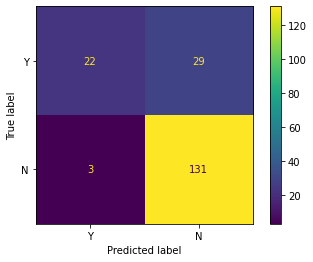

In [ ]:
#displaying confusion matrics
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
label=["Y","N"]
cmd=ConfusionMatrixDisplay(result,display_labels=label)
cmd.plot()